In [2]:
import matplotlib.pyplot as plt

class GameOfLife(object):
    '''
    A class to simulate Conway's Game of Life on a 2D grid.

    The grid size is defined by x_dim (rows) and y_dim (columns).
    Cell state is represented by 1 (alive) or 0 (dead).
    '''

    def __init__(self, x_dim, y_dim):
        '''
        Initializes the Game of Life grid.

        Parameters:
        x_dim (int): The number of rows in the grid.
        y_dim (int): The number of columns in the grid.
        '''
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]

    def get_grid(self):
        '''
        Returns the current state of the life_grid.

        Returns:
        list of list of int: The current 2D grid representing the game state.
        '''
        return self.life_grid

    def print_grid(self):
        '''
        Prints the current state of the grid to the console in a user-friendly format.

        Returns:
        None: The method prints directly to the console and does not return a value.
        '''
        print("\n--- Current Game State (Console) ---")
        separator_length = self.y_dim * 2
        separator = "-" * separator_length

        for i in range(self.x_dim):
            for j in range(self.y_dim):
                print(self.life_grid[i][j], end=' ')

            print()

            if i < self.x_dim - 1:
                print(separator)

        print("------------------------------------")

    def populate_grid(self, coord):
        '''
        Populates the game grid with live cells at the specified coordinates.

        Parameters:
        coord (list of tuple): A list of (row, col) tuples representing the coordinates of live cells.

        Returns:
        list of list of int: The updated life_grid with the new live cells.
        '''
        for r, c in coord:
            if 0 <= r < self.x_dim and 0 <= c < self.y_dim:
                self.life_grid[r][c] = 1
        return self.life_grid

    def make_step(self):
        '''
        Advances the game state by one generation according to Conway's rules.

        The method calculates the new state based on the current state and neighbor counts,
        then updates the life_grid in place.

        Returns:
        list of list of int: The updated life_grid after one generation step.
        '''
        sum_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]

        for r in range(self.x_dim):
            for c in range(self.y_dim):
                neighbor_sum = 0
                for i in range(r - 1, r + 2):
                    for j in range(c - 1, c + 2):
                        if 0 <= i < self.x_dim and 0 <= j < self.y_dim and (i, j) != (r, c):
                            neighbor_sum += self.life_grid[i][j]
                sum_grid[r][c] = neighbor_sum

        new_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]

        for r in range(self.x_dim):
            for c in range(self.y_dim):
                current_state = self.life_grid[r][c]
                live_neighbors = sum_grid[r][c]

                if current_state == 1:
                    if 2 <= live_neighbors <= 3:
                        new_grid[r][c] = 1
                elif current_state == 0 and live_neighbors == 3:
                    new_grid[r][c] = 1

        self.life_grid = new_grid
        return self.life_grid

    def make_n_steps(self, n):
        '''
        Advances the game state by a specified number of generations.

        Parameters:
        n (int): The number of steps (generations) to advance the simulation.

        Returns:
        list of list of int: The updated life_grid after 'n' generation steps.
        '''
        for _ in range(n):
            self.make_step()
        return self.life_grid

    def draw_grid(self):
        '''
        Creates a scatter plot visualization of the current game state using matplotlib.

        Live cells (1) are drawn as black squares, and dead cells (0) are white.
        The plot is displayed using plt.show().

        Returns:
        None: The method displays a plot and does not return a value.
        '''
        # 1. Initialize the arrays for x (column) and y (row) coordinates
        x_coords = []
        y_coords = []
        cell_states = [] # To hold the cell value (0 or 1) for coloring

        # 2. Fill the coordinate arrays
        # Note: In plotting, the row index (r) is typically the y-coordinate,
        # and the column index (c) is the x-coordinate.
        for r in range(self.x_dim):
            for c in range(self.y_dim):
                # x.append(j) and y.append(i) from the prompt
                x_coords.append(c)  # Column index is x-coordinate
                y_coords.append(r)  # Row index is y-coordinate
                cell_states.append(self.life_grid[r][c])

        # 3. Set up the plot
        fig, ax = plt.subplots(figsize=(self.y_dim * 0.5 + 1, self.x_dim * 0.5 + 1))

        # 4. Draw the scatter plot
        # The 'c' argument colors the points based on cell_states (0 or 1)
        # 'cmap' sets the color scheme (e.g., binary: 0=black, 1=white by default,
        # but here 0=dead/white, 1=live/black is more intuitive).
        scatter = ax.scatter(
            x_coords,
            y_coords,
            c=cell_states,
            cmap='gray_r', # 'gray_r' makes 0 (dead) white and 1 (live) black
            s=200,          # Marker size
            marker='s',     # Use squares for a grid look
            edgecolor='k'   # Black edge for definition
        )

        # 5. Set the limits of the plot and invert the axes
        # Set limits to center the squares on the integer coordinates and show grid lines
        ax.set_xlim(-0.5, self.y_dim - 0.5)
        ax.set_ylim(-0.5, self.x_dim - 0.5)

        # Invert the y-axis so row 0 (index 0) is at the top, matching console output
        ax.invert_yaxis()

        # Set axis labels and ticks to represent grid indices
        ax.set_xticks(range(self.y_dim))
        ax.set_yticks(range(self.x_dim))
        ax.set_xlabel("Column Index")
        ax.set_ylabel("Row Index")

        # Draw a grid over the plot
        ax.grid(True, which='major', axis='both', linestyle='-', color='lightgray', linewidth=1)

        # Remove tick marks for a cleaner look
        ax.tick_params(length=0)

        ax.set_title("Conway's Game of Life Visualization")
        plt.show()

# `1. Create the Class and Its _init_ Method`

In [4]:
# Create an instance of the GameOfLife class
x_test = 5
y_test = 8
game = GameOfLife(x_test, y_test)

# --- Test 1: Check the dimensions ---
rows = len(game.life_grid)
cols = len(game.life_grid[0]) if rows > 0 else 0

print(f"Testing a grid of size {x_test}x{y_test}:")

# Verify row dimension
assert rows == x_test, f"FAIL: Expected {x_test} rows, but got {rows}"
print(f"Row dimension check passed: {rows} rows.")

# Verify column dimension
assert cols == y_test, f"FAIL: Expected {y_test} columns, but got {cols}"
print(f"Column dimension check passed: {cols} columns.")


# --- Test 2: Check contents (all zeros) ---
all_dead = True
for row in game.life_grid:
    if any(cell != 0 for cell in row):
        all_dead = False
        break

assert all_dead, "FAIL: Expected all cells to be 0, but found live cells."
print("Contents check passed: All cells are 0 (dead).")

# Display the resulting grid for visual confirmation
print("\nInitialized Grid:")
for row in game.life_grid:
    print(row)

Testing a grid of size 5x8:
Row dimension check passed: 5 rows.
Column dimension check passed: 8 columns.
Contents check passed: All cells are 0 (dead).

Initialized Grid:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


# `2. Create a Method to Return the Grid`

In [5]:
# Create a 3x5 instance of the GameOfLife class
x_test = 3
y_test = 5
game = GameOfLife(x_test, y_test)

print(f"Testing a grid initialized to {x_test}x{y_test}.")

# Use the get_grid() method to retrieve the grid
retrieved_grid = game.get_grid()

print("\nGrid retrieved using game.get_grid():")
for row in retrieved_grid:
    print(row)

# Verify the dimensions of the retrieved grid
assert len(retrieved_grid) == x_test
assert len(retrieved_grid[0]) == y_test

print("\nSuccessfully retrieved the initialized grid.")

Testing a grid initialized to 3x5.

Grid retrieved using game.get_grid():
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]

Successfully retrieved the initialized grid.


# `3. Create a Method to Print the Grid`

In [7]:
# Create a 4x6 instance of the GameOfLife class
game = GameOfLife(4, 6)

print("Calling print_grid() on the 4x6 initialized grid:")

# Call the new print_grid method
game.print_grid()

Calling print_grid() on the 4x6 initialized grid:

--- Current Game State ---
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
--------------------------


# `4. Create a Method to Populate the Grid`

In [9]:
# Create a 5x5 instance of the GameOfLife class
game = GameOfLife(5, 5)

# Coordinates for a Glider pattern (a set of live cells)
glider_coords = [
    (1, 2), 
    (2, 3), 
    (3, 1), 
    (3, 2), 
    (3, 3)
]

print(f"Populating a 5x5 grid with the Glider pattern (5 live cells).")

# Call the populate_grid() method
game.populate_grid(glider_coords)

# Inspect the state of the grid using print_grid()
game.print_grid()

# Use get_grid() to verify a specific cell
grid_state = game.get_grid()
print(f"State of cell (2, 3): {grid_state[2][3]} (Expected: 1)")
print(f"State of cell (0, 0): {grid_state[0][0]} (Expected: 0)")

Populating a 5x5 grid with the Glider pattern (5 live cells).

--- Current Game State ---
0 0 0 0 0 
----------
0 0 1 0 0 
----------
0 0 0 1 0 
----------
0 1 1 1 0 
----------
0 0 0 0 0 
--------------------------
State of cell (2, 3): 1 (Expected: 1)
State of cell (0, 0): 0 (Expected: 0)


# `5. Create a Method to Make a Step in the Game of Life`

In [11]:
# Create a 5x5 grid for testing
game = GameOfLife(5, 5)

# Initial Blinker pattern (1,2), (2,2), (3,2)
blinker_coords = [
    (2, 1), 
    (2, 2), 
    (2, 3) 
]

# 1. Populate the grid
game.populate_grid(blinker_coords)
print("--- Initial State (Generation 0) ---")
game.print_grid()

# 2. Advance one step
game.make_step()
print("\n--- After 1 Step (Generation 1) ---")
game.print_grid()

# 3. Advance another step to confirm oscillation
game.make_step()
print("\n--- After 2 Steps (Generation 2) ---")
game.print_grid()

--- Initial State (Generation 0) ---

--- Current Game State ---
0 0 0 0 0 
----------
0 0 0 0 0 
----------
0 1 1 1 0 
----------
0 0 0 0 0 
----------
0 0 0 0 0 
--------------------------

--- After 1 Step (Generation 1) ---

--- Current Game State ---
0 0 0 0 0 
----------
0 0 1 0 0 
----------
0 0 1 0 0 
----------
0 0 1 0 0 
----------
0 0 0 0 0 
--------------------------

--- After 2 Steps (Generation 2) ---

--- Current Game State ---
0 0 0 0 0 
----------
0 0 0 0 0 
----------
0 1 1 1 0 
----------
0 0 0 0 0 
----------
0 0 0 0 0 
--------------------------


# `6. Create a Method to Make n Steps in the Game of Life`

In [14]:
# Create a 6x6 grid
game = GameOfLife(6, 6)

# Initial Toad pattern (r, c):
# (2, 2), (2, 3), (2, 4)
# (3, 1), (3, 2), (3, 3)
toad_coords = [
    (2, 2), (2, 3), (2, 4),
    (3, 1), (3, 2), (3, 3)
]

# 1. Populate the grid
game.populate_grid(toad_coords)
print("--- Initial State (Generation 0) ---")
game.print_grid()

# 2. Advance by 1 step
game.make_n_steps(1)
print("\n--- After 1 Step (Generation 1) ---")
game.print_grid() 

# 3. Advance by 1 more step (total 2)
game.make_n_steps(1)
print("\n--- After 2 Steps (Generation 2: Should match Gen 0) ---")
game.print_grid()

# Advance game by 2 steps (total 4)
game.make_n_steps(2)
print("\n--- After 4 Steps (Generation 2: Should match Gen 0 & previous) ---")
game.print_grid()

--- Initial State (Generation 0) ---

--- Current Game State ---
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
------------
0 0 1 1 1 0 
------------
0 1 1 1 0 0 
------------
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
--------------------------
Advancing the game by 1 step(s)...

--- After 1 Step (Generation 1) ---

--- Current Game State ---
0 0 0 0 0 0 
------------
0 0 0 1 0 0 
------------
0 1 0 0 1 0 
------------
0 1 0 0 1 0 
------------
0 0 1 0 0 0 
------------
0 0 0 0 0 0 
--------------------------
Advancing the game by 1 step(s)...

--- After 2 Steps (Generation 2: Should match Gen 0) ---

--- Current Game State ---
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
------------
0 0 1 1 1 0 
------------
0 1 1 1 0 0 
------------
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
--------------------------
Advancing the game by 2 step(s)...

--- After 4 Steps (Generation 2: Should match Gen 0 & previous) ---

--- Current Game State ---
0 0 0 0 0 0 
------------
0 0 0 0 0 0 
------------
0 0 1 1 1 0 
-------

# `7. Create a Method to Draw the Grid`

Initial State (Generation 0):

--- Current Game State (Console) ---
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 1 0 0 0 0 0 0 0 
--------------------
0 0 0 1 0 0 0 0 0 0 
--------------------
0 1 1 1 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
------------------------------------


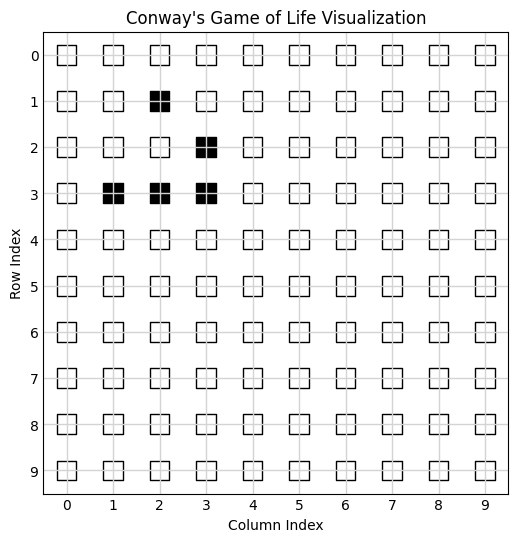


State After 4 Steps (Generation 4):

--- Current Game State (Console) ---
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 1 0 0 0 0 0 0 
--------------------
0 0 0 0 1 0 0 0 0 0 
--------------------
0 0 1 1 1 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
--------------------
0 0 0 0 0 0 0 0 0 0 
------------------------------------


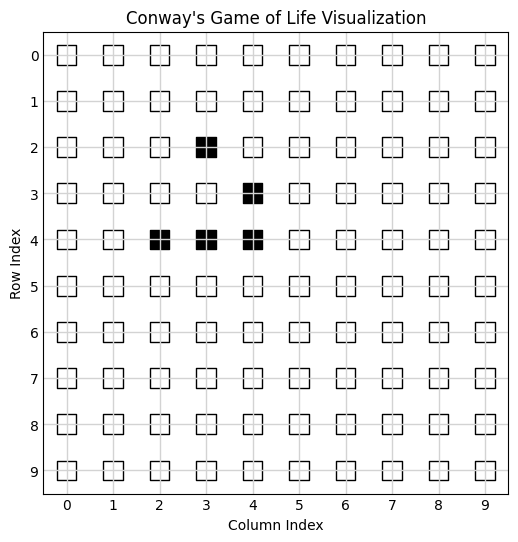

In [24]:
# Create a 10x10 instance of the GameOfLife class
game = GameOfLife(10, 10)

# Glider pattern
glider_coords = [
    (1, 2), 
    (2, 3), 
    (3, 1), 
    (3, 2), 
    (3, 3)
]

# 1. Populate the grid
game.populate_grid(glider_coords)
print("Initial State (Generation 0):")
game.print_grid()

# 2. Draw the initial state
game.draw_grid() 

# 3. Advance several steps
steps = 4
game.make_n_steps(steps)
print(f"\nState After {steps} Steps (Generation 4):")
game.print_grid()

# 4. Draw the final state
game.draw_grid()

# `8. Document the Code`

In [4]:
game = GameOfLife (5,5)
help(GameOfLife)

Help on class GameOfLife in module __main__:

class GameOfLife(builtins.object)
 |  GameOfLife(x_dim, y_dim)
 |
 |  A class to simulate Conway's Game of Life on a 2D grid.
 |
 |  The grid size is defined by x_dim (rows) and y_dim (columns).
 |  Cell state is represented by 1 (alive) or 0 (dead).
 |
 |  Methods defined here:
 |
 |  __init__(self, x_dim, y_dim)
 |      Initializes the Game of Life grid.
 |
 |      Parameters:
 |      x_dim (int): The number of rows in the grid.
 |      y_dim (int): The number of columns in the grid.
 |
 |  draw_grid(self)
 |      Creates a scatter plot visualization of the current game state using matplotlib.
 |
 |      Live cells (1) are drawn as black squares, and dead cells (0) are white.
 |      The plot is displayed using plt.show().
 |
 |      Returns:
 |      None: The method displays a plot and does not return a value.
 |
 |  get_grid(self)
 |      Returns the current state of the life_grid.
 |
 |      Returns:
 |      list of list of int: The cu

# `10. Quiz`


 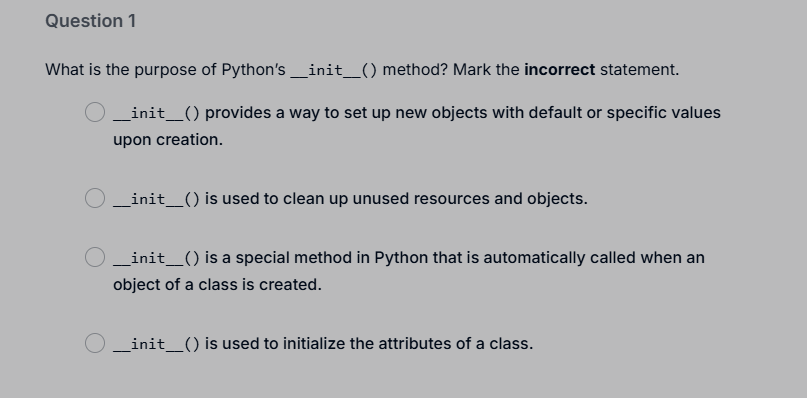
> ##  Question 1
> ### What is the purpose of Python’s __init__() method? Mark the incorrect statement.
>
>
> __init__() provides a way to set up new objects with default or specific values upon creation.
>
>
> ❌ __init__() is used to clean up unused resources and objects.
>
>
> __init__() is a special method in Python that is automatically called when an object of a class is created.
>
>
> __init__() is used to initialize the attributes of a class.

The incorrect statement is:

> **__init__() is used to clean up unused resources and objects.**

---

## 🐍 Purpose of `__init__()`

The `__init__()` method in Python is a special method (often called a **constructor**) that is automatically invoked when a new instance of a class is created.

* **Correct Purpose:** Its primary purpose is to **initialize** the newly created object. This typically involves setting the initial values for the object's attributes (instance variables), which can be specific values passed during creation or default values.

* **Incorrect Statement Explained:** The task of **cleaning up unused resources and objects** (like closing files or releasing memory) belongs to the **destructor** method, which in Python is the special method `__del__()`.

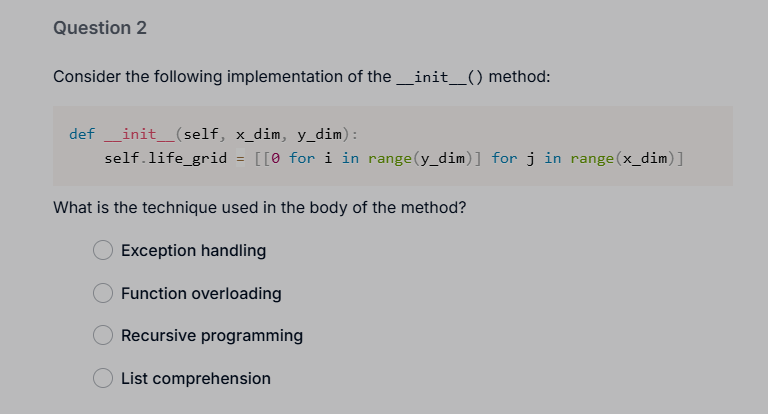
## Question 2
### Consider the following implementation of the __init__() method:

def __init__(self, x_dim, y_dim):
    self.life_grid = [[0 for i in range(y_dim)] for j in range(x_dim)]
### What is the technique used in the body of the method?


Exception handling

Function overloading

Recursive programming

✅ List comprehension

The technique used in the body of the `__init__()` method is **List comprehension**.

-----

## 🛠️ Explanation of the Technique

The core of the method's body is:

```python
self.life_grid = [[0 for i in range(y_dim)] for j in range(x_dim)]
```

This line is an example of a **nested list comprehension**, which is a concise and efficient way in Python to create lists. In this case, it's used to create a two-dimensional grid:

1.  **Inner List Comprehension:** `[0 for i in range(y_dim)]` creates a single inner list (a row) of length `y_dim`, filled entirely with the value `0`.
2.  **Outer List Comprehension:** `[... for j in range(x_dim)]` repeats the process of creating the inner list (the row) `x_dim` times.

The result is a new attribute, `self.life_grid`, which is an **$x\_dim \times y\_dim$ matrix of zeros**, perfect for initializing a game board like Conway's Game of Life.

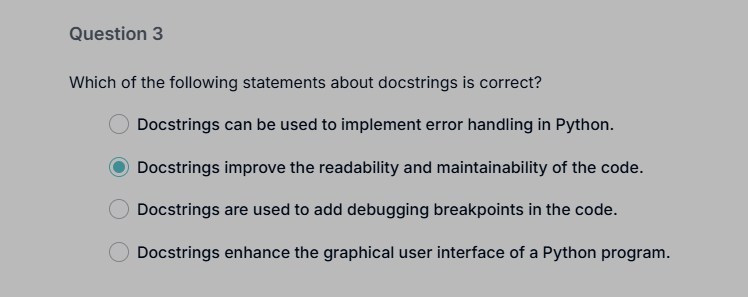
## Question 3
### Which of the following statements about docstrings is correct?

Docstrings can be used to implement error handling in Python.

✅ Docstrings improve the readability and maintainability of the code.

Docstrings are used to add debugging breakpoints in the code.

Docstrings enhance the graphical user interface of a Python program.


The correct statement about docstrings is:

> **Docstrings improve the readability and maintainability of the code.** 📝

---

## 📘 Purpose of Docstrings

Docstrings (documentation strings) are essential for good Python code for the following reasons:

* **Readability:** They provide a clear, high-level description of what a **module, class, method, or function** does, what parameters it accepts, and what it returns. This allows other developers (and your future self) to understand the code's purpose without having to read the implementation details.
* **Maintainability:** Well-documented code is easier to maintain, debug, and modify because the intent and behavior of different components are explicitly stated.
* **Automatic Documentation:** Python tools, like the built-in `help()` function you just used, and documentation generation tools (like Sphinx), automatically extract docstrings to create professional API documentation.

### Why the other options are incorrect:

* **Error Handling:** Error handling is implemented using control flow structures like `try`, `except`, `finally`, and `raise`.
* **Debugging Breakpoints:** Breakpoints are set in an Integrated Development Environment (IDE) or using the built-in `pdb` (Python Debugger) module, not docstrings.
* **Graphical User Interface (GUI):** GUI enhancement is achieved using dedicated libraries like Tkinter, PyQt, or Kivy, which control the visual elements and interaction logic.

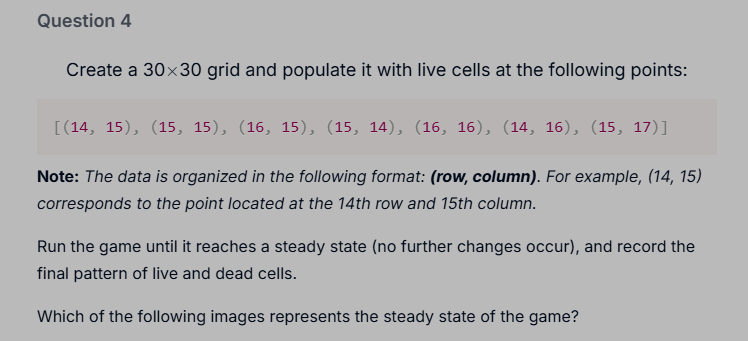
## Question 4
 Create a 30 × 30 grid and populate it with live cells at the following points:

[(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]
Note: The data is organized in the following format: (row, column). For example, (14, 15) corresponds to the point located at the 14th row and 15th column.

Run the game until it reaches a steady state (no further changes occur), and record the final pattern of live and dead cells.

### Which of the following images represents the steady state of the game?
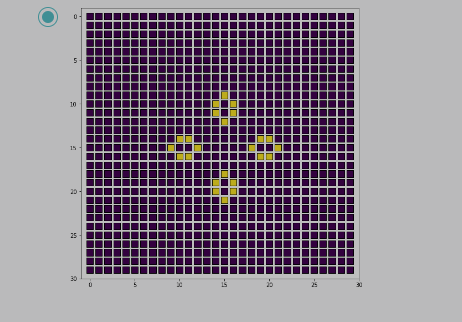

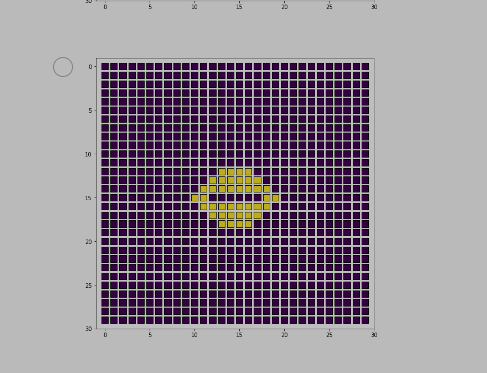

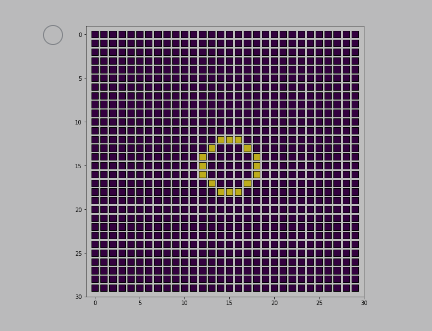

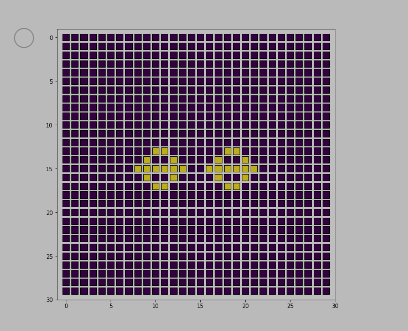
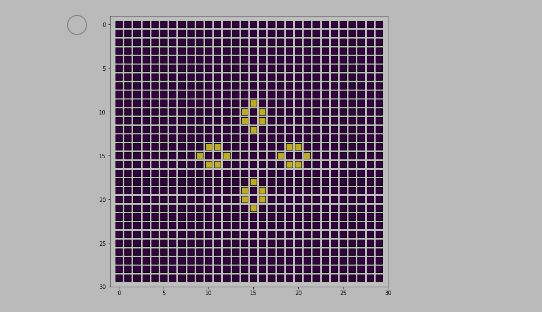

Initial State (Generation 0):


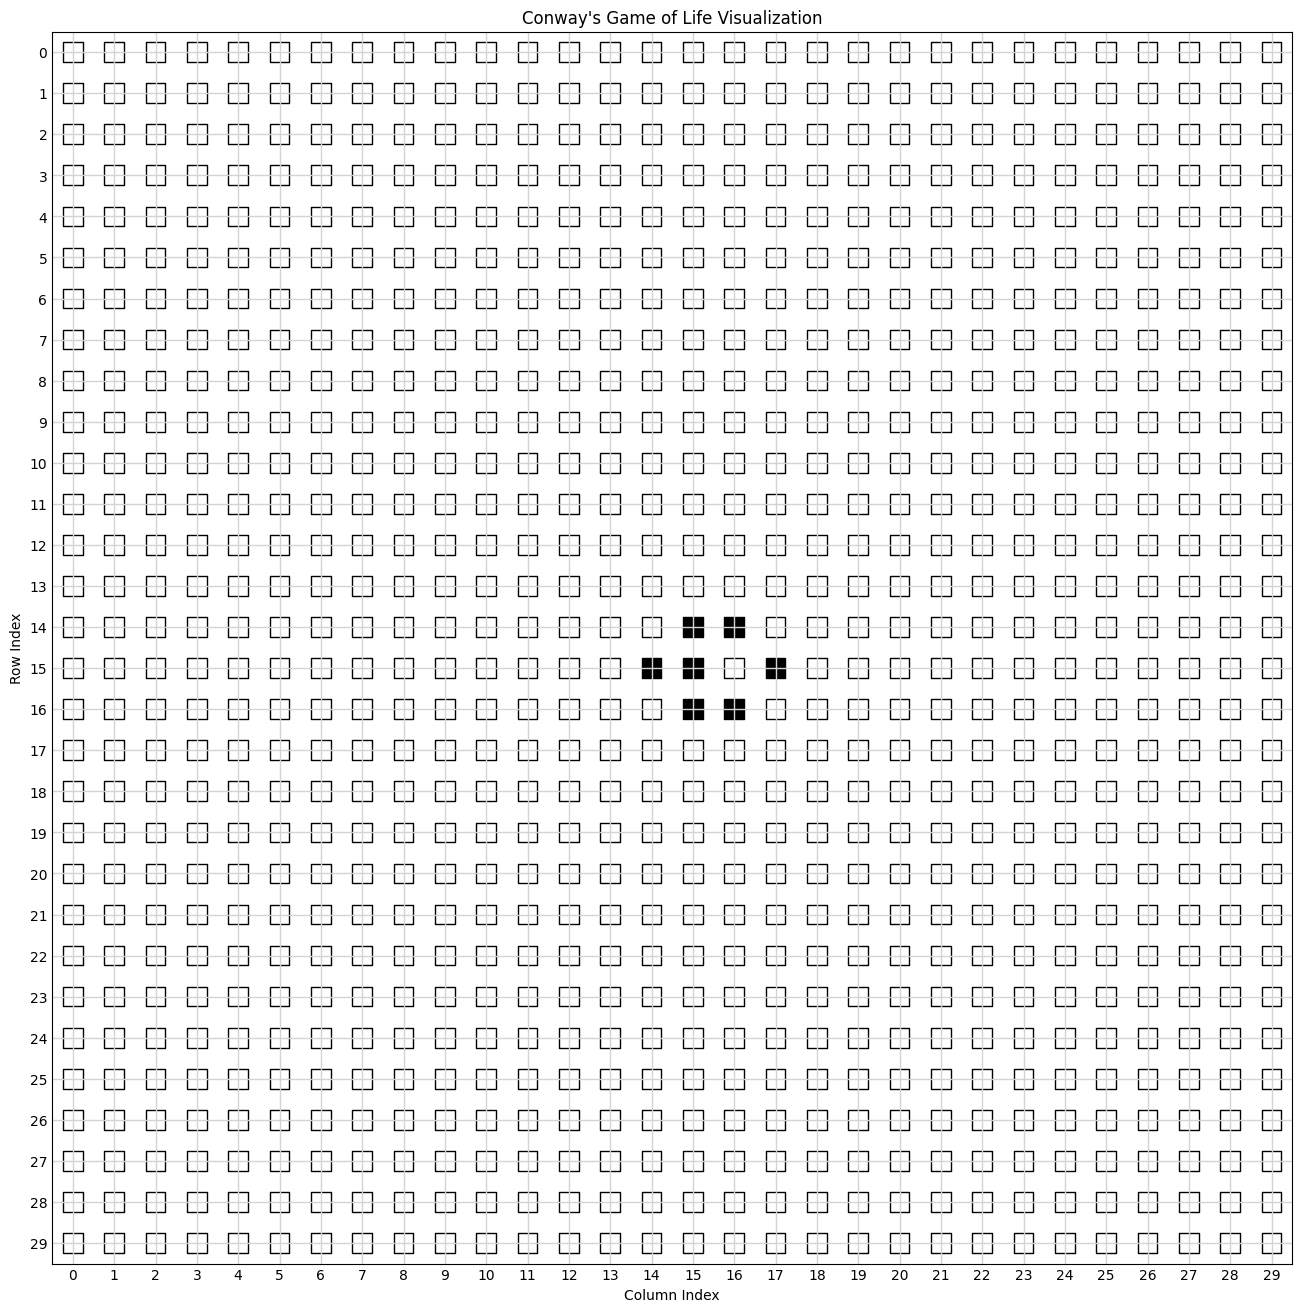


State After 100 Steps (Generation 4):


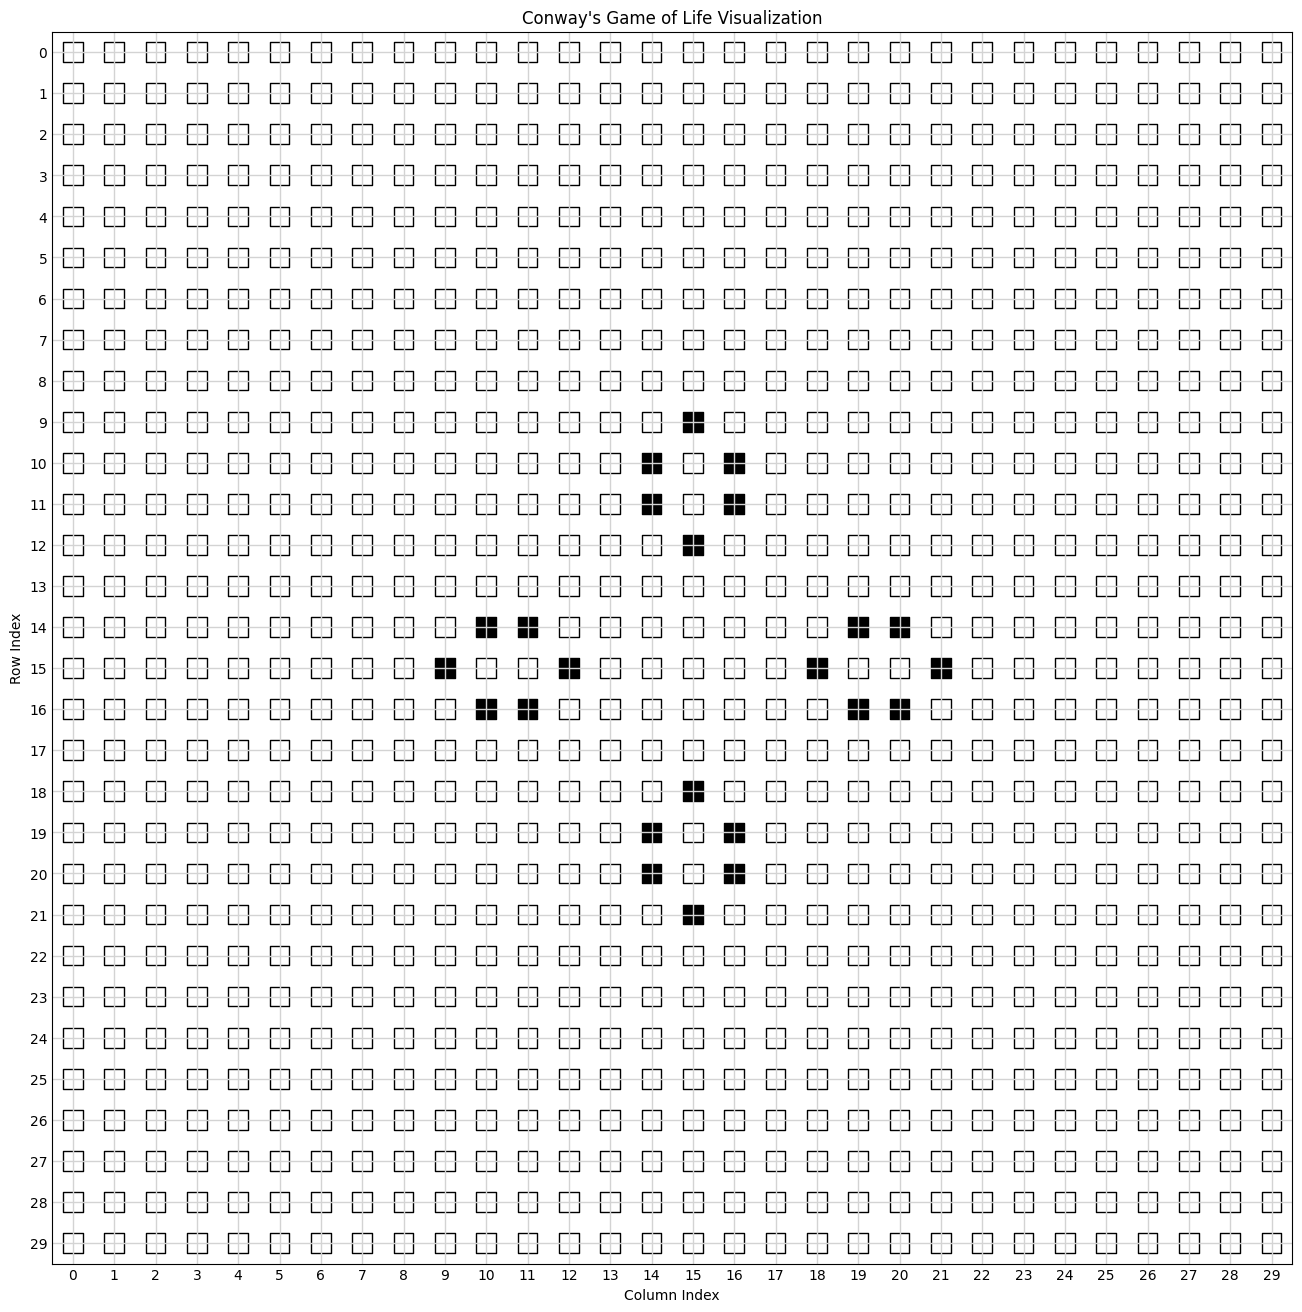

In [4]:
# Create a 10x10 instance of the GameOfLife class
game = GameOfLife(30, 30)

# Glider pattern
glider_coords =[(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]

# 1. Populate the grid
game.populate_grid(glider_coords)
print("Initial State (Generation 0):")
# game.print_grid()

# 2. Draw the initial state
game.draw_grid() 

# 3. Advance several steps
steps = 100
game.make_n_steps(steps)
print(f"\nState After {steps} Steps (Generation 4):")
# game.print_grid()

# 4. Draw the final state
game.draw_grid()

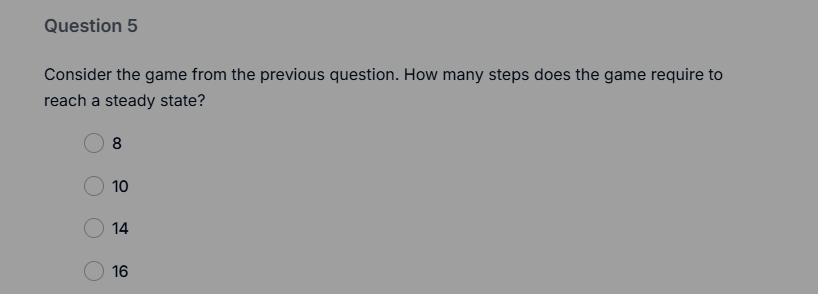
## Question 5
### Consider the game from the previous question. How many steps does the game require to reach a steady state?

8

10

14

✅ 16

Initial State (Generation 0):


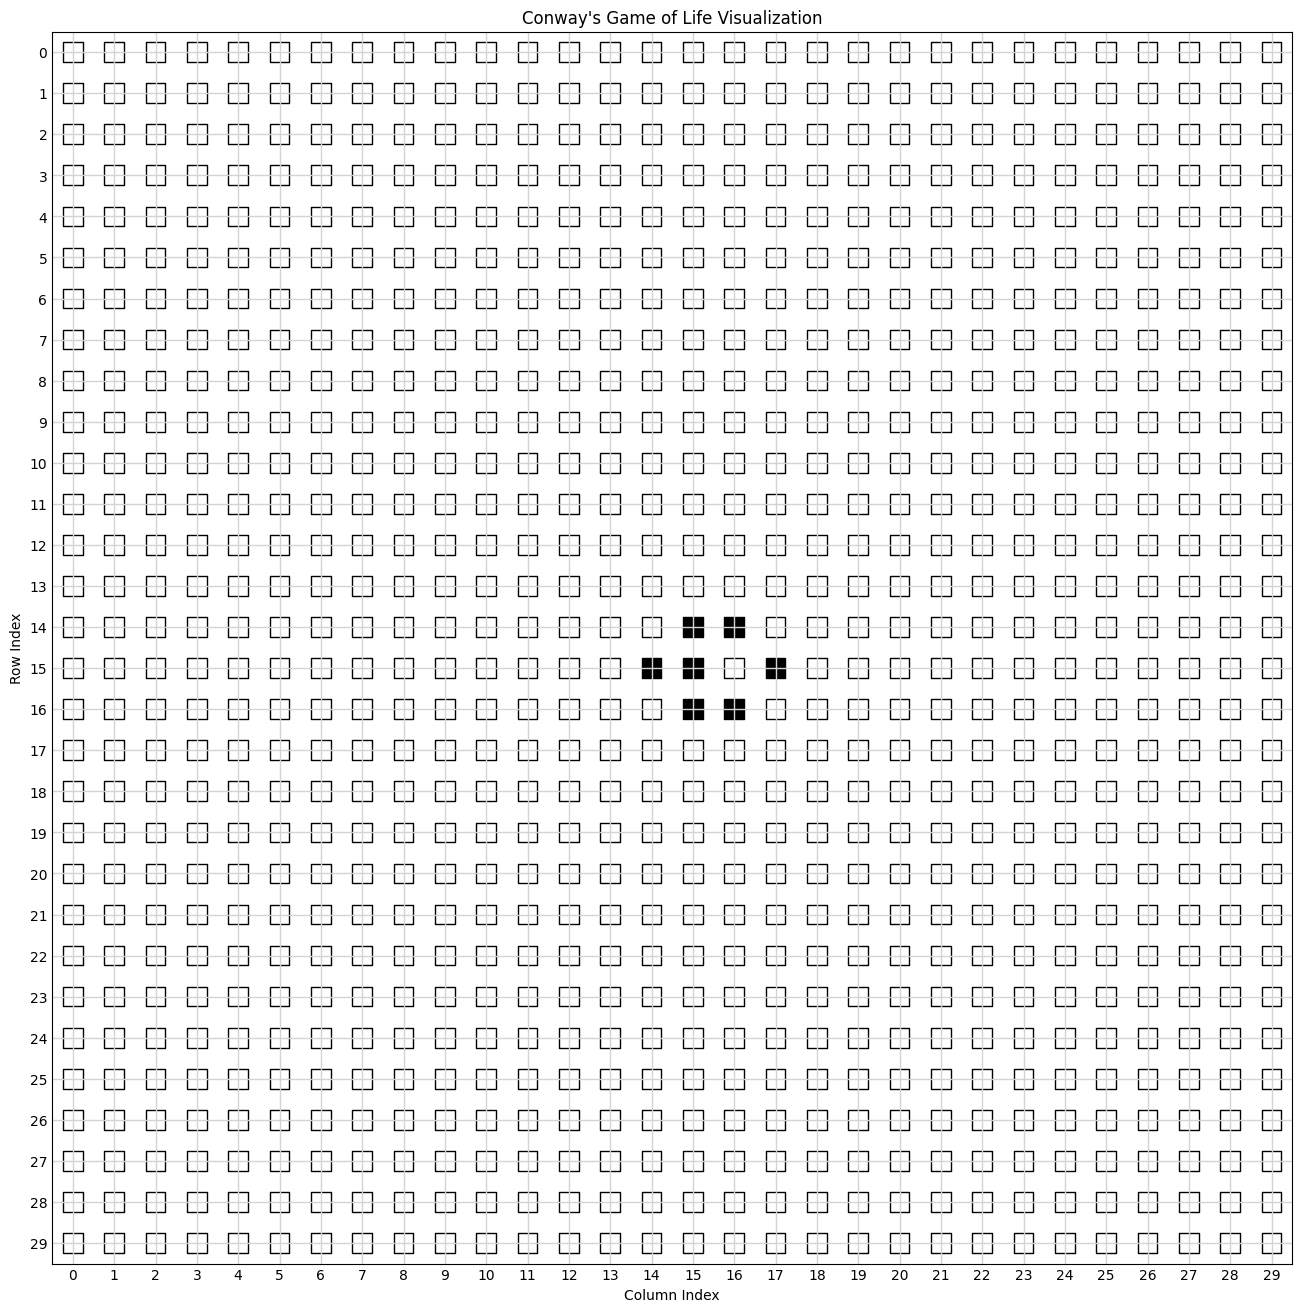


State After 16 Steps (Generation 4):


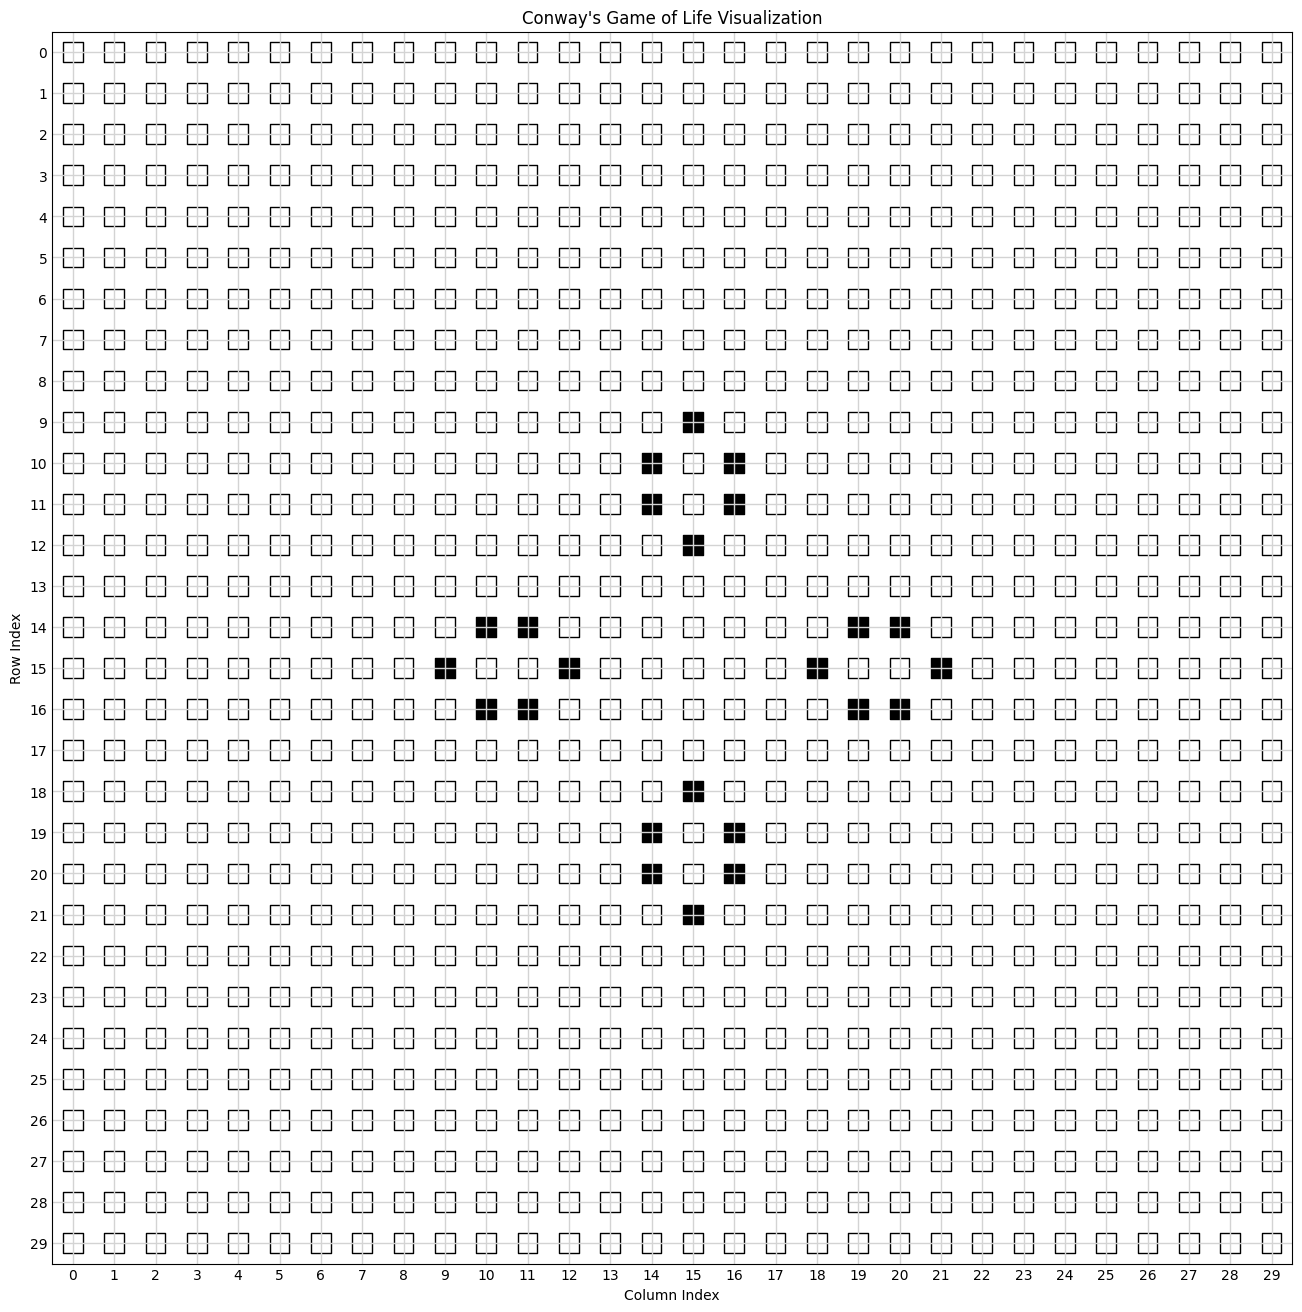

In [8]:
# Create a 10x10 instance of the GameOfLife class
game = GameOfLife(30, 30)

# Glider pattern
glider_coords =[(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]

# 1. Populate the grid
game.populate_grid(glider_coords)
print("Initial State (Generation 0):")
# game.print_grid()

# 2. Draw the initial state
game.draw_grid() 

# 3. Advance several steps
steps = 16
game.make_n_steps(steps)
print(f"\nState After {steps} Steps (Generation 4):")
# game.print_grid()


# 4. Draw the final state
game.draw_grid()

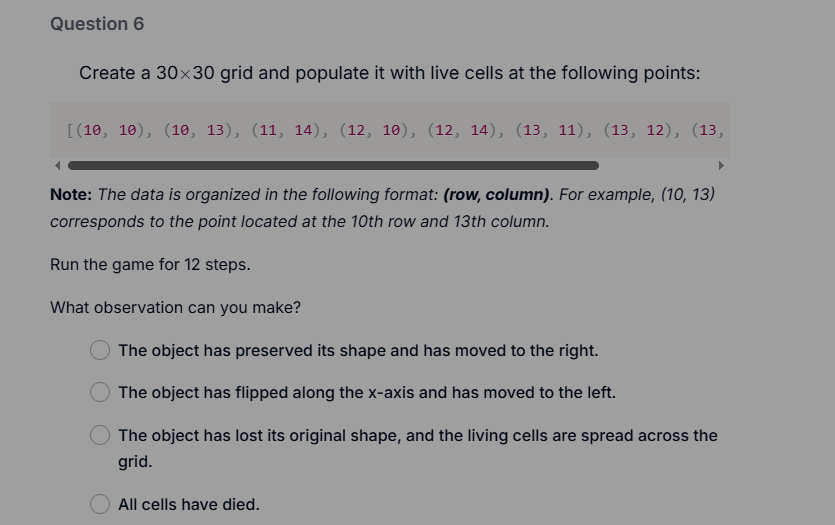
## Question 6
 
Create a 30 × 30 grid and populate it with live cells at the following points:

[(10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14)]
Note: The data is organized in the following format: (row, column). For example, (10, 13) corresponds to the point located at the 10th row and 13th column.

Run the game for 12 steps.

### What observation can you make?


✅ The object has preserved its shape and has moved to the right.

The object has flipped along the x-axis and has moved to the left.

The object has lost its original shape, and the living cells are spread across the grid.

All cells have died.

Initial State (Generation 0):


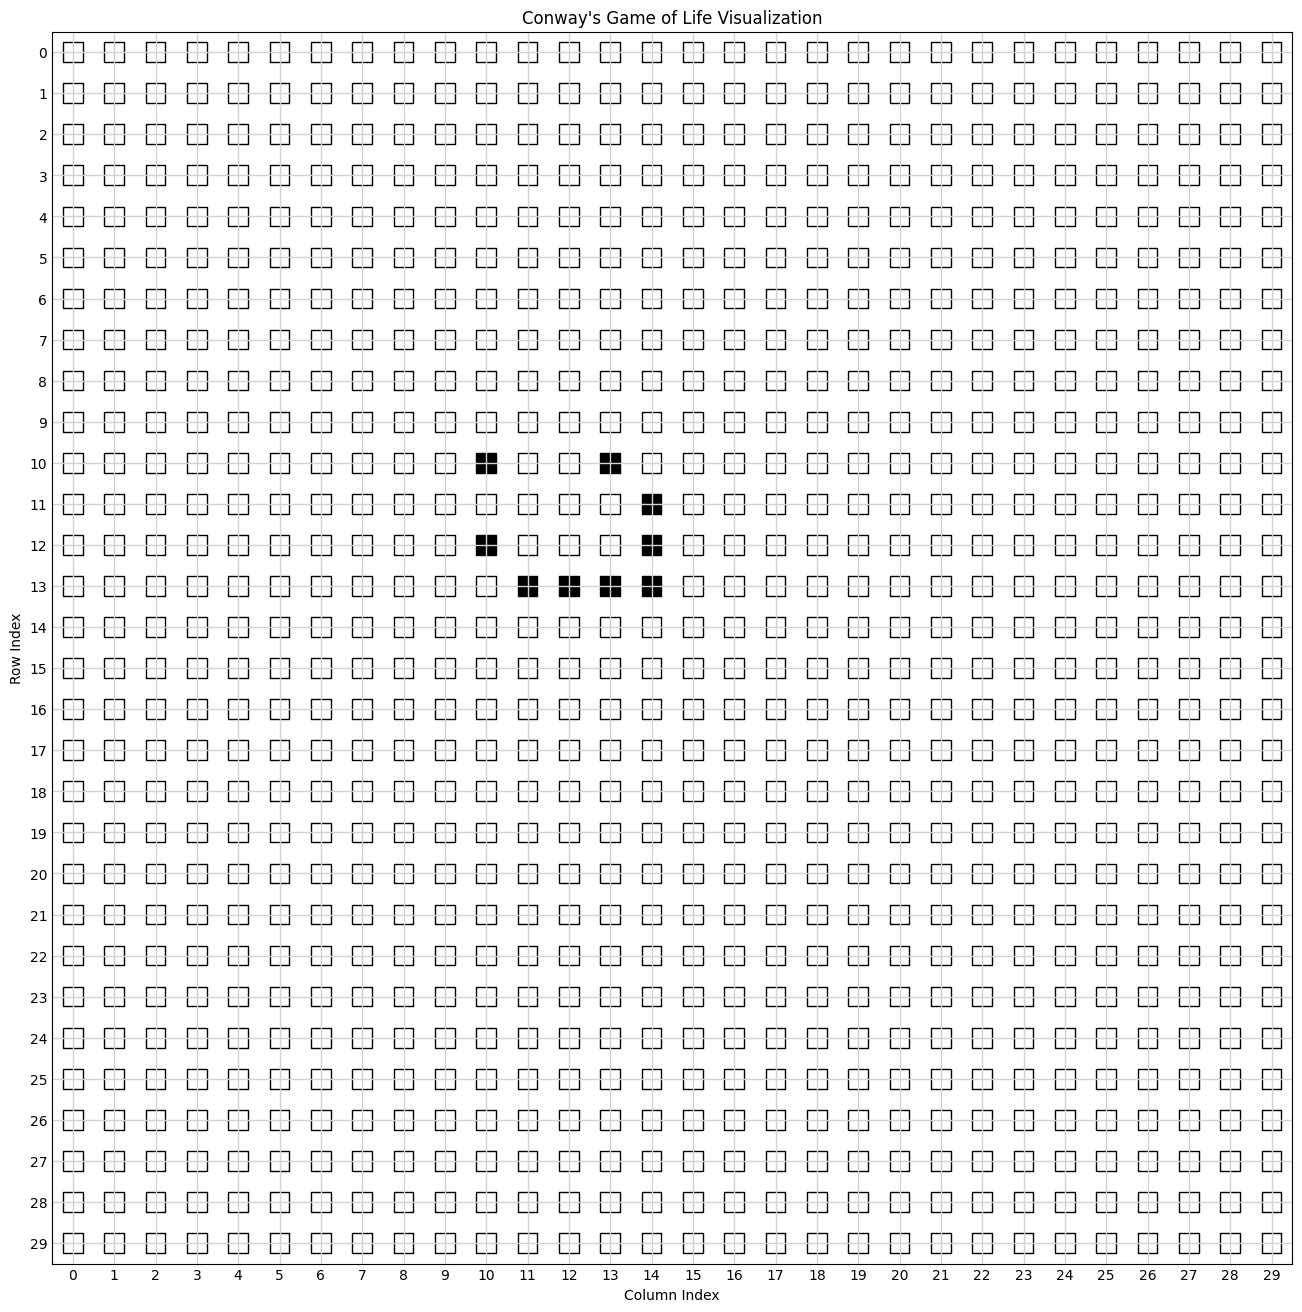


State After 12 Steps (Generation 4):


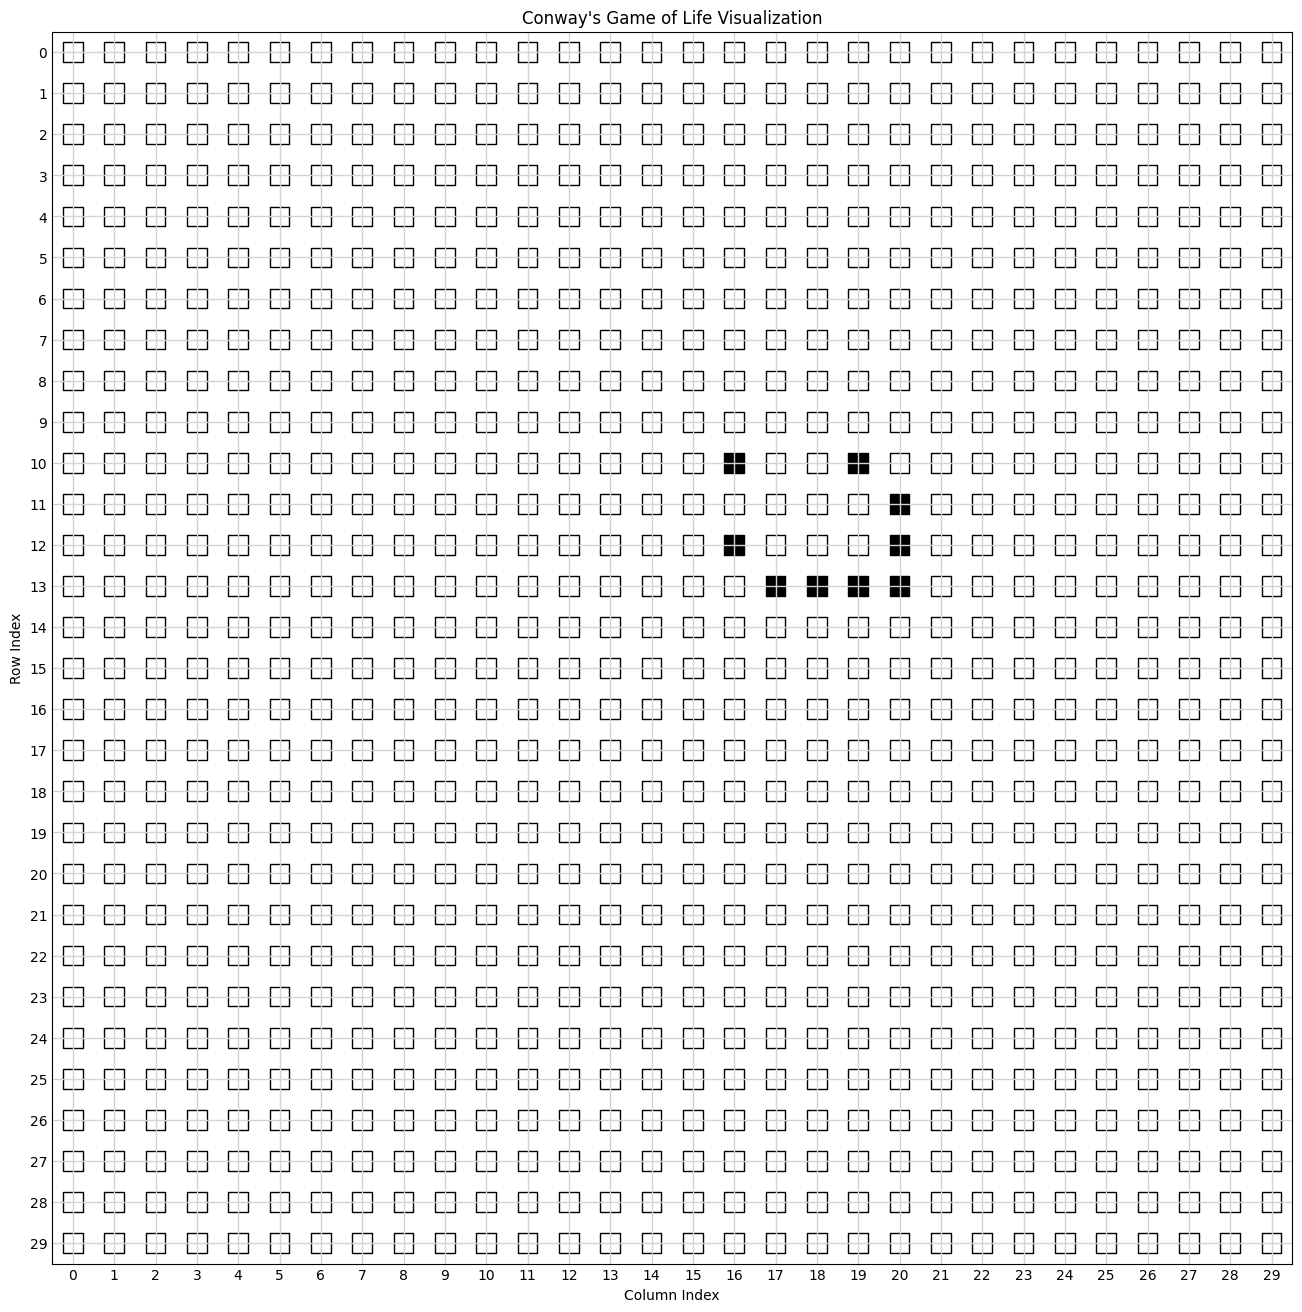

In [10]:

# Create a 10x10 instance of the GameOfLife class
game = GameOfLife(30, 30)

# Glider pattern
glider_coords =[(10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14)]

# 1. Populate the grid
game.populate_grid(glider_coords)
print("Initial State (Generation 0):")
# game.print_grid()

# 2. Draw the initial state
game.draw_grid() 

# 3. Advance several steps
steps = 12
game.make_n_steps(steps)
print(f"\nState After {steps} Steps (Generation 4):")
# game.print_grid()


# 4. Draw the final state
game.draw_grid()

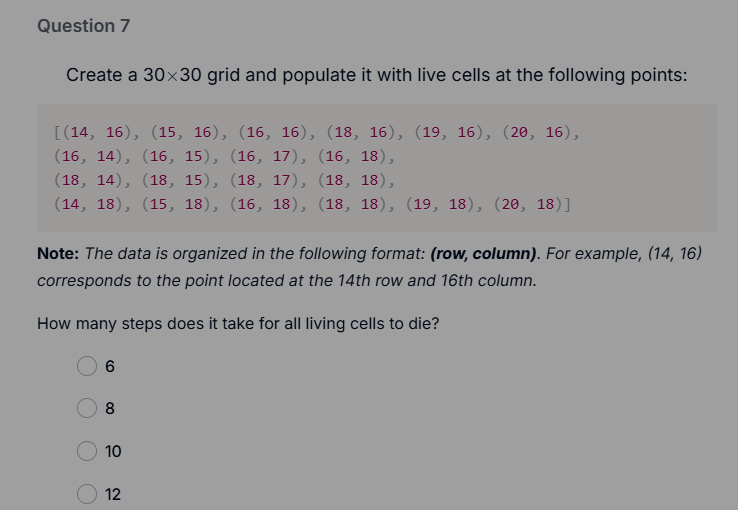
## Question 7
Create a 30 × 30 grid and populate it with live cells at the following points:

[(14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),
(16, 14), (16, 15), (16, 17), (16, 18),
(18, 14), (18, 15), (18, 17), (18, 18),
(14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)]
Note: The data is organized in the following format: (row, column). For example, (14, 16) corresponds to the point located at the 14th row and 16th column.

### How many steps does it take for all living cells to die?


✅ 6

8

10

12

Initial State (Generation 0):


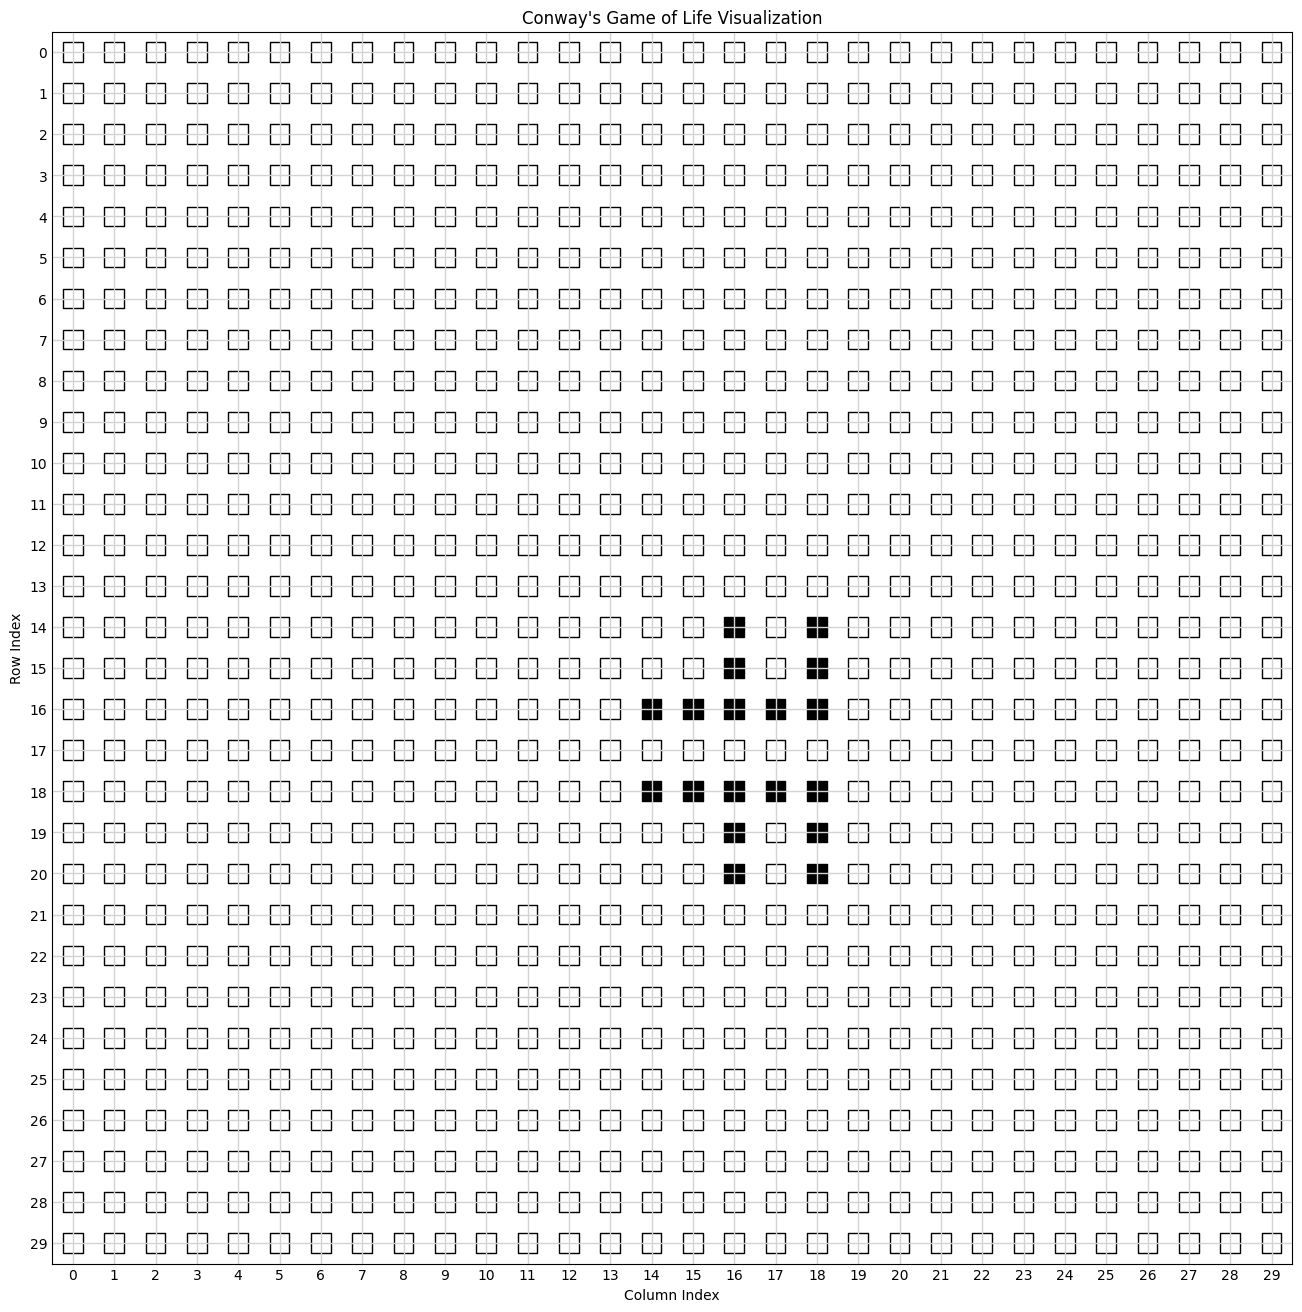


State After 6 Steps (Generation 4):


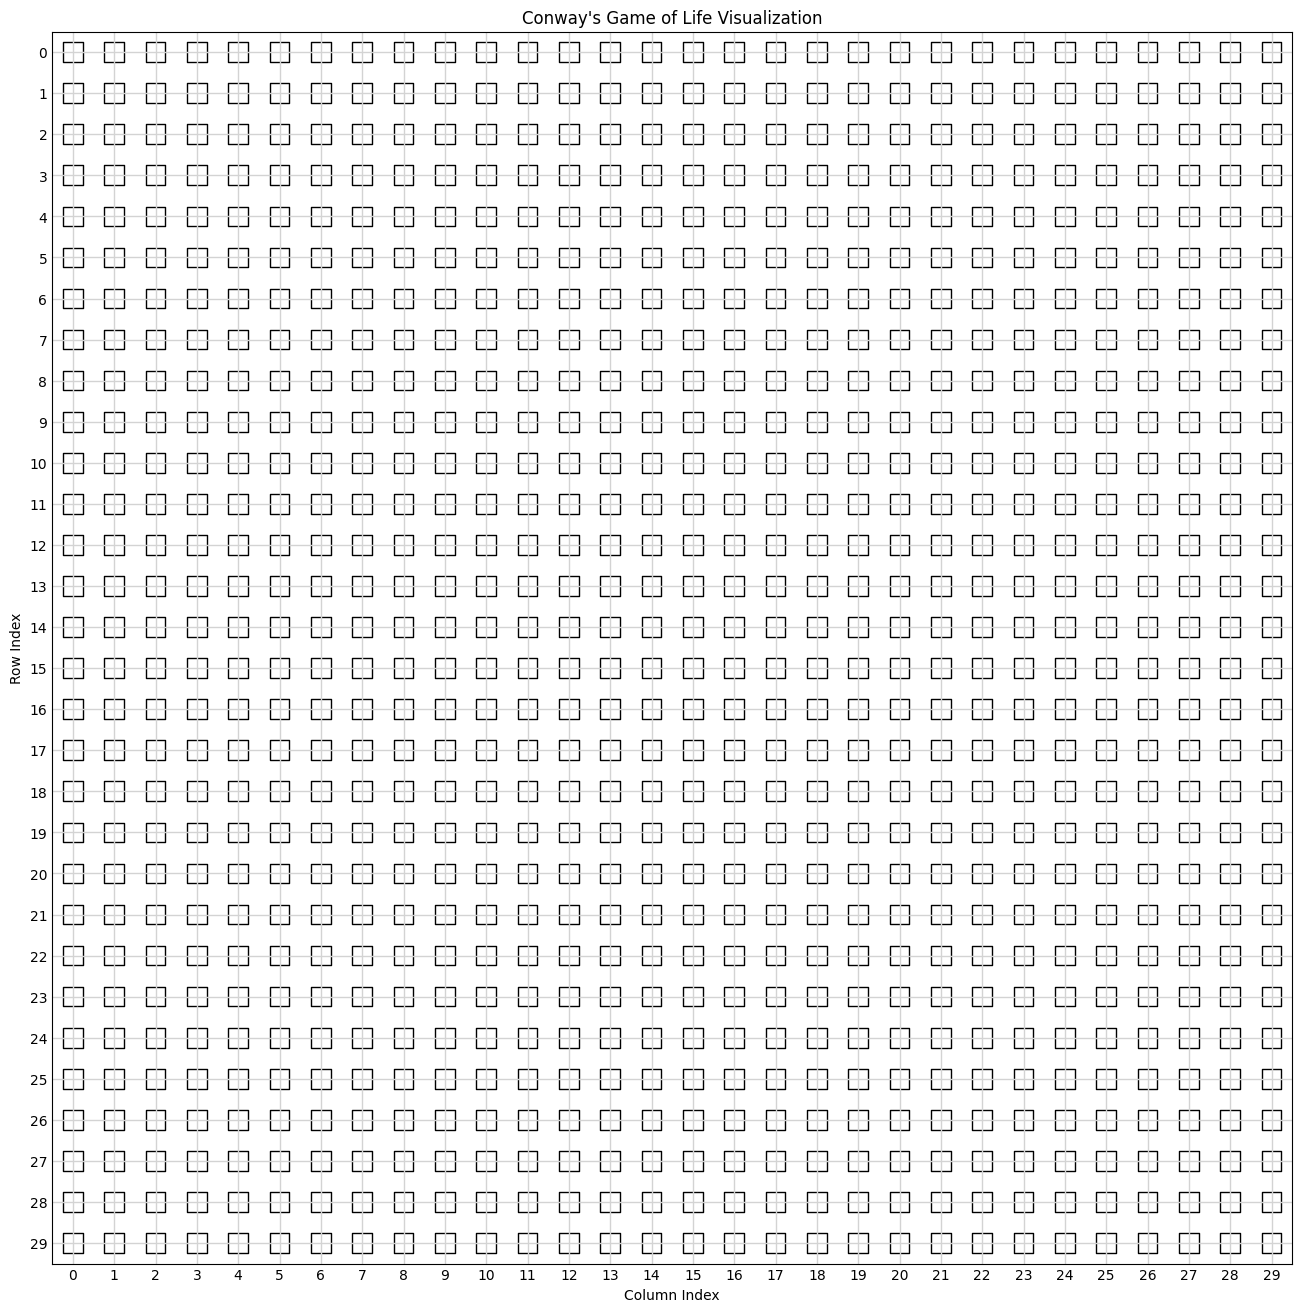

In [11]:



# Create a 10x10 instance of the GameOfLife class
game = GameOfLife(30, 30)

# Glider pattern
glider_coords =[(14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),
(16, 14), (16, 15), (16, 17), (16, 18),
(18, 14), (18, 15), (18, 17), (18, 18),
(14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)]

# 1. Populate the grid
game.populate_grid(glider_coords)
print("Initial State (Generation 0):")
# game.print_grid()

# 2. Draw the initial state
game.draw_grid() 

# 3. Advance several steps
steps = 6
game.make_n_steps(steps)
print(f"\nState After {steps} Steps (Generation 4):")
# game.print_grid()


# 4. Draw the final state
game.draw_grid()